In [1]:
from utils1 import *

import pandas
import numpy
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

plt.rcParams.update({'font.size': 20})

In [2]:
movies, ratings = load_data('data/')

try: 
    movies_with_genres = loaddata('figures/movies_with_genres')
    genres = loaddata('figures/genres')
    average_rating_per_film = loaddata('figures/average_rating_per_film')
    user_movies = loaddata('figures/user_movies')
    user_genre_ratings = loaddata('figures/user_genre_ratings')
except:
    movies_with_genres, genres = expand_genres(movies)
    average_rating_per_film = get_average_rating_per_film(ratings)
    user_movies = movies_per_user(ratings, movies_with_genres, genres)
    user_genre_ratings = average_per_user(user_movies)

    savedata(movies_with_genres,'figures/movies_with_genres')
    savedata(average_rating_per_film,'figures/average_rating_per_film')
    savedata(user_movies,'figures/user_movies')
    savedata(user_genre_ratings,'figures/user_genre_ratings')
    savedata(genres, 'figures/genres')

print('movies_with_genres', movies_with_genres.shape)
print('average_rating_per_film', average_rating_per_film.shape)
print('user_movies', user_movies.shape)
print('user_genre_ratings', user_genre_ratings.shape)

genres_list = list(user_genre_ratings.columns)

movies_with_genres (9742, 22)
average_rating_per_film (9724, 1)
user_movies (100836, 21)
user_genre_ratings (610, 20)


Data exploring

In [3]:
movies_with_genres.apply(pandas.value_counts).iloc[0,:]

movieId                  1.0
title                    NaN
Action                1828.0
Thriller              1894.0
Drama                 4361.0
IMAX                   158.0
Film-Noir               87.0
Mystery                573.0
Adventure             1263.0
Romance               1596.0
Comedy                3756.0
Children               664.0
Horror                 978.0
Documentary            440.0
Sci-Fi                 980.0
(no genres listed)      34.0
Animation              611.0
Fantasy                779.0
Western                167.0
Crime                 1199.0
Musical                334.0
War                    382.0
Name: 1, dtype: float64

In [5]:
# Replace NaN with mean
copy = user_genre_ratings.copy()
user_mean_ratings = copy.mean(axis=1)
copy.transpose().fillna(value=user_mean_ratings, inplace=True)
user_genre_ratings = copy
user_genre_ratings

,Action,Thriller,Drama,IMAX,Film-Noir,Mystery,Adventure,Romance,Comedy,Children,Horror,Documentary,Sci-Fi,(no genres listed),Animation,Fantasy,Western,Crime,Musical,War
userId,,,,,,,,,,,,,,,,,,,,
1,4.322222,4.145455,4.529412,4.364154,5.000000,4.166667,4.388235,4.307692,4.277108,4.547619,3.470588,4.364154,4.225000,4.364154,4.689655,4.297872,4.285714,4.355556,4.681818,4.500000
2,3.954545,3.700000,3.882353,3.750000,3.925850,4.000000,4.166667,4.500000,4.000000,3.925850,3.000000,4.333333,3.875000,3.925850,3.925850,3.925850,3.500000,3.800000,3.925850,4.500000
3,3.571429,4.142857,0.750000,2.163604,2.163604,5.000000,2.727273,0.500000,1.000000,0.500000,4.687500,2.163604,4.200000,2.163604,0.500000,3.375000,2.163604,0.500000,0.500000,0.500000
4,3.320000,3.552632,3.483333,3.000000,4.000000,3.478261,3.655172,3.379310,3.509615,3.800000,4.250000,4.000000,2.833333,3.638532,4.000000,3.684211,3.800000,3.814815,4.000000,3.571429
5,3.111111,3.555556,3.800000,3.666667,3.564405,4.000000,3.250000,3.090909,3.466667,4.111111,3.000000,3.564405,2.500000,3.564405,4.333333,4.142857,3.000000,3.833333,4.400000,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.178808,3.525126,3.787966,3.062500,3.812500,3.791209,3.503401,3.740845,3.565321,3.448980,3.346154,3.800000,3.556962,3.579867,3.714286,3.597938,3.411765,3.654135,3.727273,3.792308
607,3.722222,4.114754,4.012195,5.000000,3.828176,4.647059,3.466667,3.517241,3.327273,3.421053,4.114286,3.828176,3.250000,3.828176,3.333333,3.571429,4.000000,3.814815,3.600000,4.166667
608,3.330325,3.536680,3.437500,4.000000,3.750000,3.550725,3.220994,2.886792,2.736620,2.460227,3.319588,3.000000,3.296407,3.222628,3.118182,3.000000,2.636364,3.613014,2.757576,3.578947


In [ ]:
# Finding the best number of clusters
bestN = []
for r in range(40,51):
    bics = []
    for i in range(20):
        gmm = GaussianMixture(i+1, random_state=r)
        gmm.fit(user_genre_ratings)
        bics.append(gmm.bic(user_genre_ratings))
    # print(numpy.argmin(bics))
    bestN.append(numpy.argmin(bics))

value,count = numpy.unique(numpy.array(bestN), return_counts=True)
print(bestN,'\n',value,'\n', count)

## Plot histogram of bestN
number_cluster = value[numpy.argmax(count)]

## Plot BIC vs Number of Clusters
fig = plt.figure(figsize=[12, 10])
ax = fig.add_subplot(1, 1, 1)
ax.plot(bics)
ax.set_title('BIC vs Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('BIC');

########  Output: Top cluster: 4  #########

c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initializ

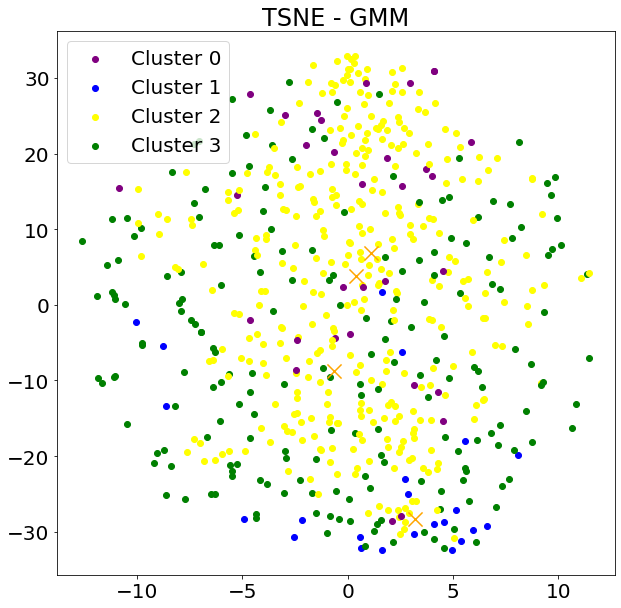

In [7]:
number_cluster = 4
random_state = 42

gmm = GaussianMixture(number_cluster, random_state=random_state)
gmm.fit(user_genre_ratings)
labels = gmm.predict(user_genre_ratings)

embeddings = TSNE(random_state=random_state).fit_transform(user_genre_ratings)
means = TSNE(random_state=random_state).fit_transform(gmm.means_)

# Plot T-NSE
colors = ['purple', 'blue', 'yellow', 'green']
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
tsne_embeddings = TSNE(random_state=42).fit_transform(numpy.vstack([user_genre_ratings, gmm.means_]))
for count,coords in enumerate(tsne_embeddings[:-number_cluster,:]):
    ax.scatter(coords[0], coords[1], c=colors[labels[count]])
for i in [20,2,0,6]: # A list that contains all samples in the correct order
    ax.scatter(tsne_embeddings[i,0], tsne_embeddings[i,0], c=colors[labels[i]], label='Cluster '+str(labels[i]))

ax.scatter(tsne_embeddings[-number_cluster:,0], tsne_embeddings[-number_cluster:,1], s=200, marker='x', c='orange')
ax.set_title("TSNE - GMM")

# ax.scatter(tsne_embeddings[:-number_cluster,0], tsne_embeddings[:-number_cluster,1], c=labels, label=labels)
# for i in range(number_cluster,0,-1):
#     ax.scatter(tsne_embeddings[-i:,0], tsne_embeddings[-i:,1], s=307, marker='x', label='Cluster '+str(i))
# legend_elements = scatter.legend_elements(num=n_components)
ax.legend()
plt.show()

In [9]:
# Mean of each cluster
cluster_0 = user_genre_ratings[labels == 0]
cluster_0.mean()

Action                3.772901
Thriller              3.729827
Drama                 3.917985
IMAX                  3.820238
Film-Noir             4.097355
Mystery               3.988388
Adventure             3.850692
Romance               3.952662
Comedy                3.909405
Children              3.940564
Horror                3.712230
Documentary           3.962322
Sci-Fi                3.741105
(no genres listed)    3.995974
Animation             4.008374
Fantasy               3.915711
Western               3.976175
Crime                 3.901705
Musical               3.818365
War                   3.789045
dtype: float64

In [10]:
# Mean of each cluster
cluster_1 = user_genre_ratings[labels == 1]
cluster_1.mean()

Action                2.493381
Thriller              2.518421
Drama                 2.963798
IMAX                  2.523202
Film-Noir             2.956315
Mystery               2.892565
Adventure             2.556202
Romance               2.777055
Comedy                2.939068
Children              2.610568
Horror                2.529228
Documentary           2.670285
Sci-Fi                2.394677
(no genres listed)    2.615854
Animation             2.516522
Fantasy               2.672005
Western               3.008027
Crime                 2.620940
Musical               2.677069
War                   3.214158
dtype: float64

In [11]:
# Mean of each cluster
cluster_2 = user_genre_ratings[labels == 2]
cluster_2.mean()

Action                3.672905
Thriller              3.742267
Drama                 3.845569
IMAX                  3.866304
Film-Noir             3.847494
Mystery               3.862573
Adventure             3.711888
Romance               3.729036
Comedy                3.644601
Children              3.679807
Horror                3.654453
Documentary           3.814653
Sci-Fi                3.673297
(no genres listed)    3.764764
Animation             3.788606
Fantasy               3.681292
Western               3.749409
Crime                 3.839402
Musical               3.754523
War                   3.972436
dtype: float64

In [12]:
# Mean of each cluster
cluster_3 = user_genre_ratings[labels == 3]
cluster_3.mean()

Action                3.425623
Thriller              3.523692
Drama                 3.661561
IMAX                  3.651739
Film-Noir             3.579080
Mystery               3.593537
Adventure             3.529562
Romance               3.522824
Comedy                3.448720
Children              3.262530
Horror                3.293507
Documentary           3.617616
Sci-Fi                3.375843
(no genres listed)    3.515299
Animation             3.466486
Fantasy               3.428075
Western               3.526953
Crime                 3.704675
Musical               3.486343
War                   3.692309
dtype: float64

In [ ]:
# Replace NaN with mean
copy = user_genre_ratings.copy()
user_mean_ratings = copy.mean(axis=1)
copy.transpose().fillna(value=user_mean_ratings, inplace=True)
user_genre_ratings = copy
user_genre_ratings

,Action,Thriller,Drama,IMAX,Film-Noir,Mystery,Adventure,Romance,Comedy,Children,Horror,Documentary,Sci-Fi,(no genres listed),Animation,Fantasy,Western,Crime,Musical,War
userId,,,,,,,,,,,,,,,,,,,,
1,4.322222,4.145455,4.529412,4.364154,5.000000,4.166667,4.388235,4.307692,4.277108,4.547619,3.470588,4.364154,4.225000,4.364154,4.689655,4.297872,4.285714,4.355556,4.681818,4.500000
2,3.954545,3.700000,3.882353,3.750000,3.925850,4.000000,4.166667,4.500000,4.000000,3.925850,3.000000,4.333333,3.875000,3.925850,3.925850,3.925850,3.500000,3.800000,3.925850,4.500000
3,3.571429,4.142857,0.750000,2.163604,2.163604,5.000000,2.727273,0.500000,1.000000,0.500000,4.687500,2.163604,4.200000,2.163604,0.500000,3.375000,2.163604,0.500000,0.500000,0.500000
4,3.320000,3.552632,3.483333,3.000000,4.000000,3.478261,3.655172,3.379310,3.509615,3.800000,4.250000,4.000000,2.833333,3.638532,4.000000,3.684211,3.800000,3.814815,4.000000,3.571429
5,3.111111,3.555556,3.800000,3.666667,3.564405,4.000000,3.250000,3.090909,3.466667,4.111111,3.000000,3.564405,2.500000,3.564405,4.333333,4.142857,3.000000,3.833333,4.400000,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.178808,3.525126,3.787966,3.062500,3.812500,3.791209,3.503401,3.740845,3.565321,3.448980,3.346154,3.800000,3.556962,3.579867,3.714286,3.597938,3.411765,3.654135,3.727273,3.792308
607,3.722222,4.114754,4.012195,5.000000,3.828176,4.647059,3.466667,3.517241,3.327273,3.421053,4.114286,3.828176,3.250000,3.828176,3.333333,3.571429,4.000000,3.814815,3.600000,4.166667
608,3.330325,3.536680,3.437500,4.000000,3.750000,3.550725,3.220994,2.886792,2.736620,2.460227,3.319588,3.000000,3.296407,3.222628,3.118182,3.000000,2.636364,3.613014,2.757576,3.578947


In [52]:
def recommend_movies(userId, threshold_rating = 4, user_percentage_threshold=0.5):
    # Get cluster (i.e. other users from the same cluster with user) 
    clusterId_of_user = labels[userId-1]
    print('ClusterId of user:', clusterId_of_user)
    cluster_of_user = user_genre_ratings[labels == clusterId_of_user]
    cluster_of_user = cluster_of_user.drop([userId])

    # Get movieIds that user has watched
    movieIds_of_user = ratings[ratings.userId == userId]
    # print(movieIds_of_user)

    # Movies that cluster has watched, including user's
    movieIds = pandas.DataFrame()
    for userId in cluster_of_user.index:
        movieIds = pandas.concat([movieIds, ratings[ratings.userId == userId].movieId])


    # Remove movies that user has watched from 'moviesId'
    movieIds_of_cluster_original_full = movieIds.copy()
    for movieId in movieIds_of_user.iloc[:,1]:
        movieIds = movieIds[movieIds.iloc[:,0] != movieId]
    print(f"Removed {len(movieIds_of_cluster_original_full) - len(movieIds)} movies that are already in user's watched list.")

    # Drop duplicates and check if the difference
    movieIds_of_cluster_original = movieIds.copy()
    movieIds_nodup = movieIds.drop_duplicates()

    # Add number of times a movie has been watched by cluster users
    values, counts = numpy.unique(movieIds_of_cluster_original.iloc[:,0], return_counts=True) # return in value ascending order
    movieIds_nodup.sort_values(by=0) # so we have to sort the movieId to match the count
    movieIds_nodup['count'] = counts
    # print(movieIds_nodup)

    #### Recommendation part
    recommendations = pandas.DataFrame()
    for i in range(len(movieIds_nodup)):
        movieId_nodup = movieIds_nodup.iloc[i,0]
        count_movieId = movieIds_nodup.iloc[i,1]
        count_rating_above_4 = 0
        for movie_rating in ratings[ratings.movieId == movieId_nodup].rating:
            if movie_rating > threshold_rating:
                count_rating_above_4 += 1
        if count_rating_above_4 > count_movieId*user_percentage_threshold:
            recommendations = pandas.concat([recommendations, pandas.DataFrame(data = {'movieId': [movieId], 'count_rating_above_4': [count_rating_above_4]}) ])

    
    # recommendations = []
    # for i in range(len(movieIds_nodup)):
    #     movieId = movieIds_nodup.iloc[i,0]
    #     count_movieId = movieIds_nodup.iloc[i,1]
    #     count_rating_above_4 = 0
    #     for movie_rating in ratings[ratings.movieId == movieId].rating:
    #         if movie_rating > threshold_rating:
    #             count_rating_above_4 += 1
    #     if count_rating_above_4 > count_movieId*user_percentage_threshold:
    #         recommendations.append(movieId)

    # print(recommendations)
    
    recommendations = recommendations.sort_values(by='count_rating_above_4', ascending=False)
    return recommendations

In [65]:
user_to_recommend = 4
user_genre_ratings.iloc[user_to_recommend-1,:]

Average ratings of user: 4


Action                3.320000
Thriller              3.552632
Drama                 3.483333
IMAX                  3.000000
Film-Noir             4.000000
Mystery               3.478261
Adventure             3.655172
Romance               3.379310
Comedy                3.509615
Children              3.800000
Horror                4.250000
Documentary           4.000000
Sci-Fi                2.833333
(no genres listed)    3.638532
Animation             4.000000
Fantasy               3.684211
Western               3.800000
Crime                 3.814815
Musical               4.000000
War                   3.571429
Name: 4, dtype: float64

In [53]:
user_to_recommend = 4
print('Average ratings of user: ' + str(user_to_recommend))
print(user_genre_ratings.iloc[user_to_recommend-1,:])

recommendations_user_4 = recommend_movies(user_to_recommend, 4, 0.5)
recommendations_user_4.iloc[:5,:]

ClusterId of user: 2
Removed 8220 movies that are already in user's watched list.


c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,movieId,count_rating_above_4
0,318.0,202
0,356.0,155
0,527.0,128
0,858.0,114
0,50.0,113
0,110.0,101
0,4993.0,100
0,1210.0,92
0,7153.0,87
0,2028.0,85


In [69]:
user_to_recommend = 42
print('Average ratings of user: ' + str(user_to_recommend))
print(user_genre_ratings.iloc[user_to_recommend-1,:])

recommendations_user_42 = recommend_movies(user_to_recommend, 4, 0.5)
recommendations_user_42.iloc[:5,:]

Average ratings of user: 42
Action                3.400000
Thriller              3.577586
Drama                 3.818713
IMAX                  4.500000
Film-Noir             3.500000
Mystery               3.962963
Adventure             3.513889
Romance               3.640449
Comedy                3.412322
Children              2.928571
Horror                3.000000
Documentary           4.333333
Sci-Fi                3.250000
(no genres listed)    3.671503
Animation             4.000000
Fantasy               3.590909
Western               3.916667
Crime                 3.746479
Musical               3.857143
War                   3.809524
Name: 42, dtype: float64
ClusterId of user: 2
Removed 15837 movies that are already in user's watched list.


c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,movieId,count_rating_above_4
0,4993.0,100
0,1198.0,89
0,7153.0,87
0,2858.0,86
0,4226.0,83


In [70]:
user_to_recommend = 314
print('Average ratings of user: ' + str(user_to_recommend))
print(user_genre_ratings.iloc[user_to_recommend-1,:])

recommendations_user_314 = recommend_movies(user_to_recommend, 4, 0.5);
recommendations_user_314.iloc[:5,:]

Average ratings of user: 314
Action                2.820000
Thriller              2.710526
Drama                 3.400000
IMAX                  3.666667
Film-Noir             3.095759
Mystery               3.000000
Adventure             2.842105
Romance               3.357143
Comedy                3.062500
Children              3.153846
Horror                2.833333
Documentary           3.095759
Sci-Fi                2.961538
(no genres listed)    3.095759
Animation             3.125000
Fantasy               3.214286
Western               2.600000
Crime                 3.000000
Musical               3.166667
War                   3.714286
Name: 314, dtype: float64
ClusterId of user: 2
Removed 8109 movies that are already in user's watched list.


c:\Users\Duy Anh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,movieId,count_rating_above_4
0,2571.0,150
0,2959.0,130
0,858.0,114
0,1196.0,108
0,4993.0,100
